In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from scipy.stats import linregress

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.00, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# coordinates

In [12]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

647

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
       
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | tuatapere
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | kichmengskiy gorodok
Processing Record 9 of Set 1 | omsukchan
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | belyy yar
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | bandarbeyla
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | punta arenas


KeyboardInterrupt: 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esso,55.9333,158.7000,10.80,94,100,2.98,RU,2021-12-22 10:53:58
1,Guerrero Negro,27.9769,-114.0611,60.28,80,99,8.77,MX,2021-12-22 10:53:59
2,Qaanaaq,77.4840,-69.3632,27.39,55,3,9.71,GL,2021-12-22 10:53:59
3,East London,-33.0153,27.9116,77.94,69,20,14.97,ZA,2021-12-22 10:53:59
4,Vung Tau,10.3460,107.0843,78.44,82,98,18.37,VN,2021-12-22 10:54:00
5,Yellowknife,62.4560,-114.3525,-25.58,81,90,0.00,CA,2021-12-22 10:50:56
6,Bredasdorp,-34.5322,20.0403,76.32,65,100,12.66,ZA,2021-12-22 10:54:00
7,Atuona,-9.8000,-139.0333,78.55,73,92,21.14,PF,2021-12-22 10:54:01
8,Cape Town,-33.9258,18.4232,80.11,66,20,5.01,ZA,2021-12-22 10:53:51
9,Hithadhoo,-0.6000,73.0833,82.58,67,95,2.15,MV,2021-12-22 10:54:01


In [9]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esso,RU,2021-12-22 10:53:58,55.9333,158.7000,10.80,94,100,2.98
1,Guerrero Negro,MX,2021-12-22 10:53:59,27.9769,-114.0611,60.28,80,99,8.77
2,Qaanaaq,GL,2021-12-22 10:53:59,77.4840,-69.3632,27.39,55,3,9.71
3,East London,ZA,2021-12-22 10:53:59,-33.0153,27.9116,77.94,69,20,14.97
4,Vung Tau,VN,2021-12-22 10:54:00,10.3460,107.0843,78.44,82,98,18.37
...,...,...,...,...,...,...,...,...,...
569,Tacoronte,ES,2021-12-22 11:14:45,28.4769,-16.4102,67.75,77,20,1.99
570,Rassvet,RU,2021-12-22 11:14:46,46.8333,40.7500,14.95,73,89,13.42
571,Tanout,NE,2021-12-22 11:14:46,14.9709,8.8879,75.15,14,2,19.30
572,Corinto,GR,2021-12-22 11:10:06,37.9407,22.9573,53.42,68,90,3.65


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

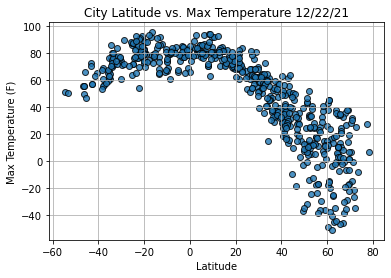

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

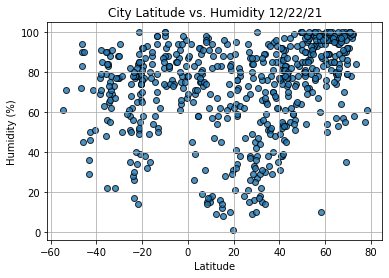

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

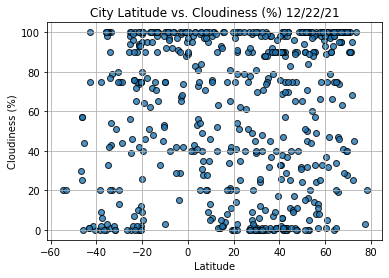

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

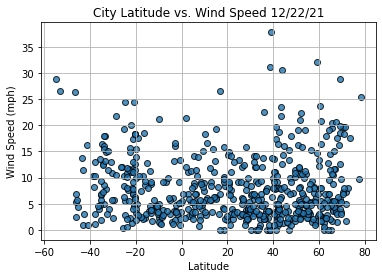

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esso,RU,2021-12-22 10:53:58,55.9333,158.7000,10.80,94,100,2.98
1,Guerrero Negro,MX,2021-12-22 10:53:59,27.9769,-114.0611,60.28,80,99,8.77
2,Qaanaaq,GL,2021-12-22 10:53:59,77.4840,-69.3632,27.39,55,3,9.71
3,East London,ZA,2021-12-22 10:53:59,-33.0153,27.9116,77.94,69,20,14.97
4,Vung Tau,VN,2021-12-22 10:54:00,10.3460,107.0843,78.44,82,98,18.37


In [20]:
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2021-12-22 10:49:10
Lat                      -38.0023
Lng                      -57.5575
Max Temp                    68.88
Humidity                       91
Cloudiness                     75
Wind Speed                    3.0
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
569     True
570     True
571     True
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esso,RU,2021-12-22 10:53:58,55.9333,158.7000,10.80,94,100,2.98
1,Guerrero Negro,MX,2021-12-22 10:53:59,27.9769,-114.0611,60.28,80,99,8.77
2,Qaanaaq,GL,2021-12-22 10:53:59,77.4840,-69.3632,27.39,55,3,9.71
4,Vung Tau,VN,2021-12-22 10:54:00,10.3460,107.0843,78.44,82,98,18.37
5,Yellowknife,CA,2021-12-22 10:50:56,62.4560,-114.3525,-25.58,81,90,0.00


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esso,RU,2021-12-22 10:53:58,55.9333,158.7000,10.80,94,100,2.98
1,Guerrero Negro,MX,2021-12-22 10:53:59,27.9769,-114.0611,60.28,80,99,8.77
2,Qaanaaq,GL,2021-12-22 10:53:59,77.4840,-69.3632,27.39,55,3,9.71
4,Vung Tau,VN,2021-12-22 10:54:00,10.3460,107.0843,78.44,82,98,18.37
5,Yellowknife,CA,2021-12-22 10:50:56,62.4560,-114.3525,-25.58,81,90,0.00


In [27]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,East London,ZA,2021-12-22 10:53:59,-33.0153,27.9116,77.94,69,20,14.97
6,Bredasdorp,ZA,2021-12-22 10:54:00,-34.5322,20.0403,76.32,65,100,12.66
7,Atuona,PF,2021-12-22 10:54:01,-9.8000,-139.0333,78.55,73,92,21.14
8,Cape Town,ZA,2021-12-22 10:53:51,-33.9258,18.4232,80.11,66,20,5.01
9,Hithadhoo,MV,2021-12-22 10:54:01,-0.6000,73.0833,82.58,67,95,2.15


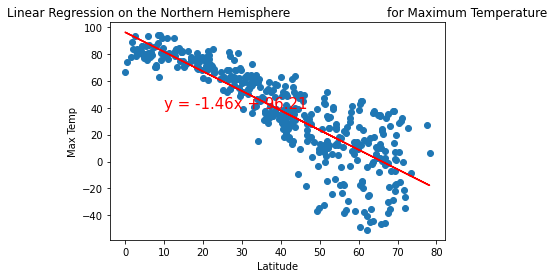

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

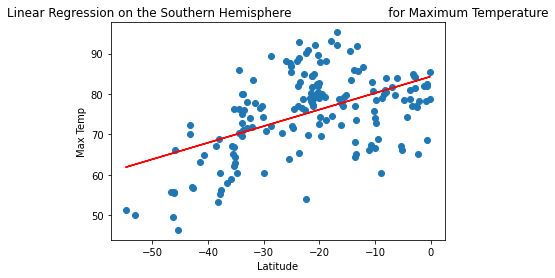

In [39]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

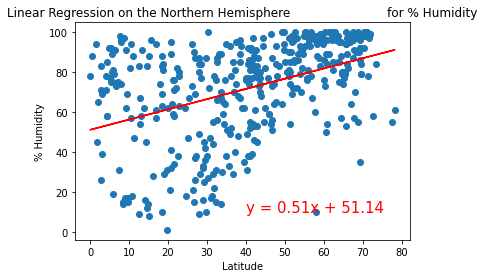

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

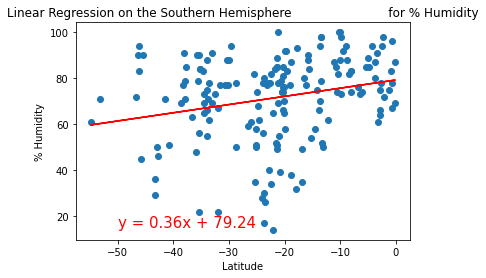

In [46]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

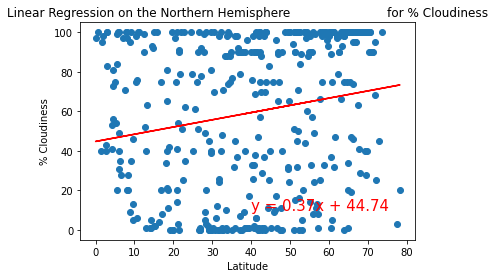

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

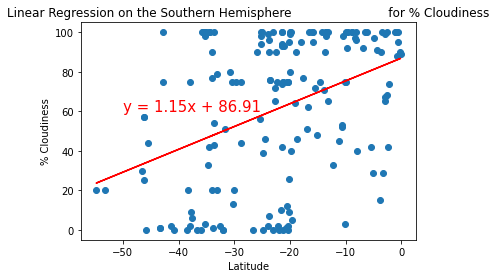

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

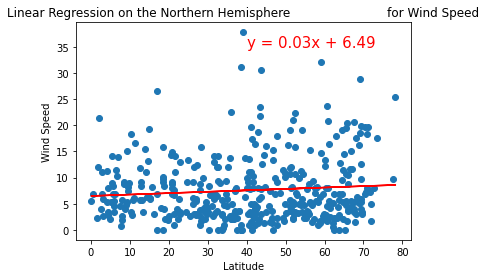

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

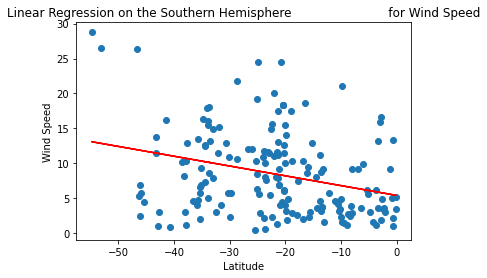

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [21]:
city_url = url + "&q=" + "Cleveland"

In [23]:
city_weather = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': -81.6954, 'lat': 41.4995}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.85, 'feels_like': 51.66, 'temp_min': 52.54, 'temp_max': 55.58, 'pressure': 1005, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 170, 'gust': 23.02}, 'clouds': {'all': 90}, 'dt': 1640388583, 'sys': {'type': 1, 'id': 3455, 'country': 'US', 'sunrise': 1640350279, 'sunset': 1640383294}, 'timezone': -18000, 'id': 5150529, 'name': 'Cleveland', 'cod': 200}
